In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
data = pd.read_csv("./data/Titanic_train.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# DEA(탐색적 데이터분석)
* 데이터의 특성, 분포, 변환
* 수치형 데이터, 범주형 데이터를 따로 분석

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [13]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())

In [ ]:
data['Carbin'] = dropna(data['Embarked'], )

# 범주형 데이터와 수치형 데이터 분리

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
categorical_1 = data[['Name', 'Sex', 'Ticket',  'Embarked']]
numerical_1 = data[[ 'Age', 'SibSp', 'Parch',  'Fare', 'Pclass','Survived']]

In [32]:
categorical_1.describe(include='all')

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,644


In [30]:
for cat_cols in categorical_1:
    print(cat_cols)
    print(data[cat_cols].value_counts())

Name
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64
Sex
Sex
male      577
female    314
Name: count, dtype: int64
Ticket
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: 

dtype()을 출력해서 조건문으로 범주형과 수치형 자료를 분리

In [37]:
categorical_2_cols = []
numerical_2_cols = []
for col in data:
    # print(col, data[col].dtype)
    if data[col].dtype =='object':
        categorical_2_cols.append(col)
    else:
        numerical_2_cols.append(col)
print(categorical_2_cols)
print(numerical_2_cols)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [38]:
data[categorical_2_cols]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [39]:
data[numerical_2_cols]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


select_dtypes()를 이용한 범주형, 수치형 변수 구분하기

In [45]:
cate_cols =  data.select_dtypes(include=['object'])

In [46]:
num_cols = data.select_dtypes(exclude=['object'])

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64


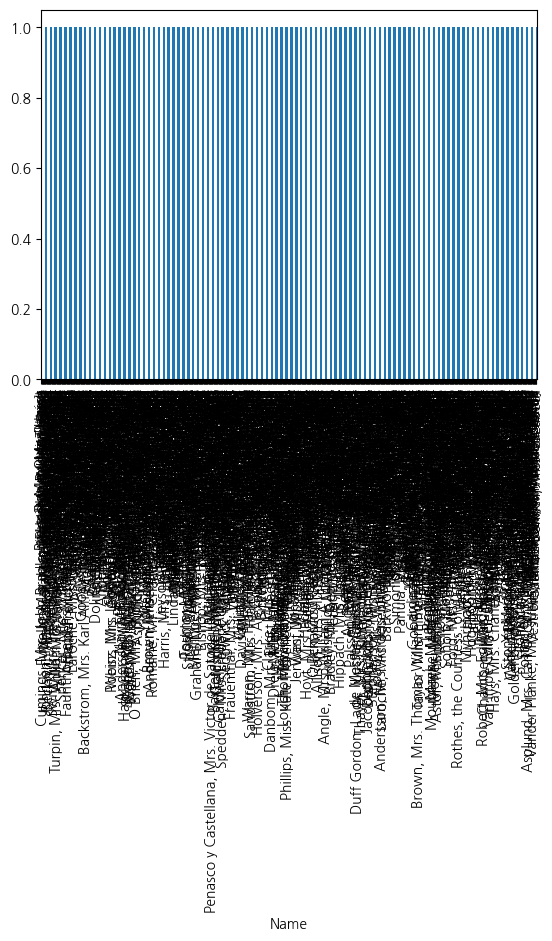

Sex
male      577
female    314
Name: count, dtype: int64


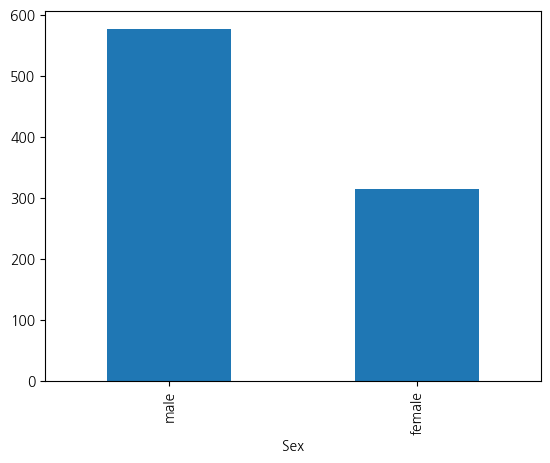

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64


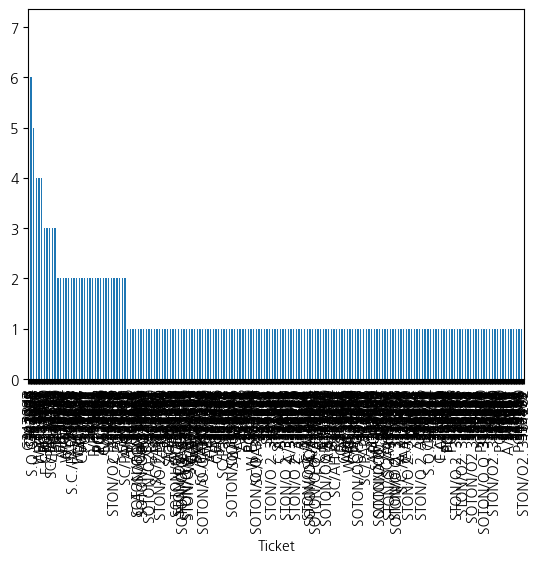

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64


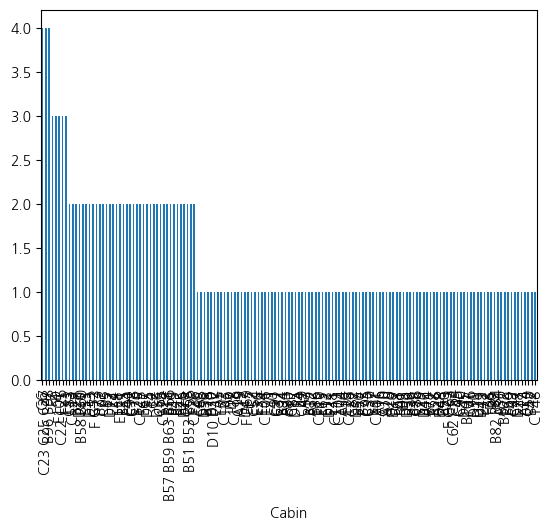

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


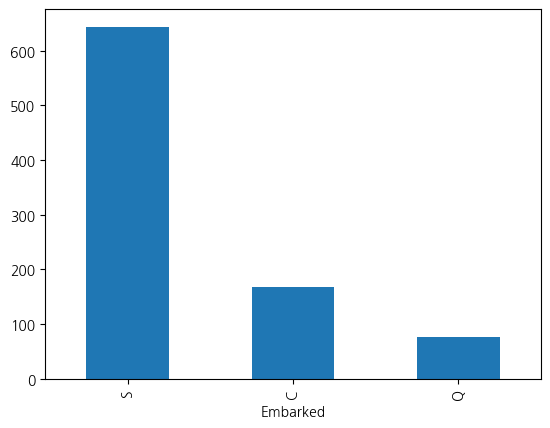

In [77]:
for col in cate_cols:
    print(cate_cols[col].value_counts())
    cate_cols[col].value_counts().plot(kind='bar')
    plt.show()

In [48]:
num_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [51]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [54]:
data['PassengerId'].unique

AttributeError: 'DataFrame' object has no attribute 'unique'

In [58]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

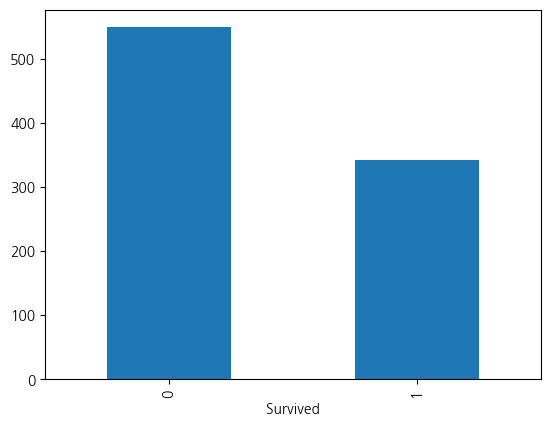

In [59]:
data['Survived'].value_counts().plot(kind="bar")

In [63]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

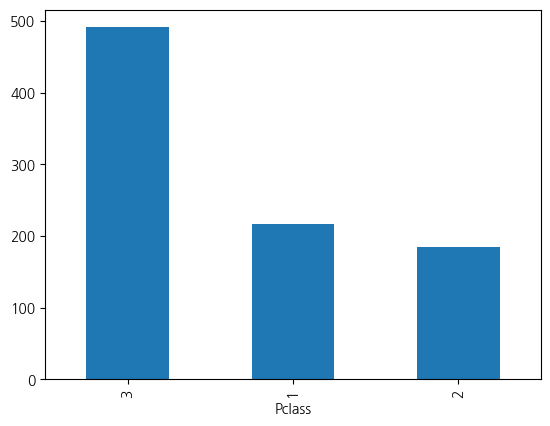

In [65]:
data['Pclass'].value_counts().plot(kind='bar')

In [67]:
data['Name'].nunique()

891

In [68]:
data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [69]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

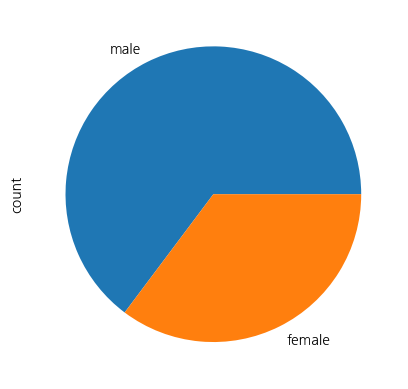

In [71]:
data['Sex'].value_counts().plot(kind='pie')

In [73]:
data['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

In [75]:
data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

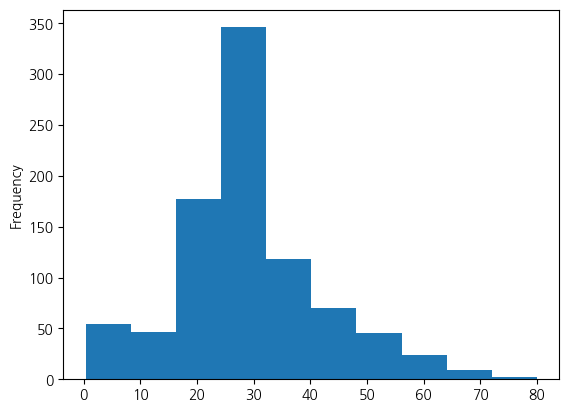

In [76]:
data['Age'].plot(kind='hist')

In [78]:
data['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [79]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

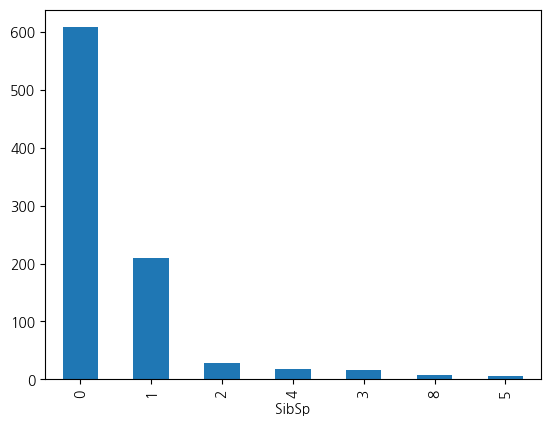

In [80]:
data['SibSp'].value_counts().plot(kind='bar')

In [81]:
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

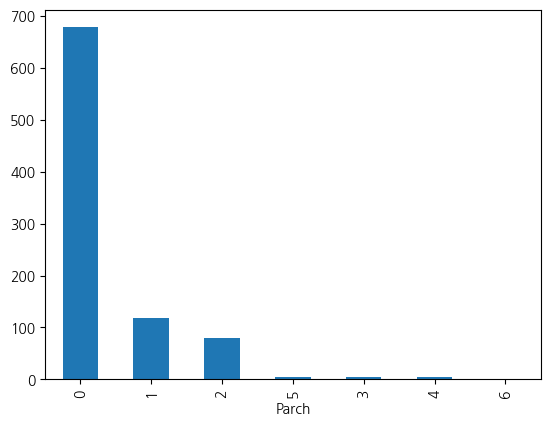

In [82]:
data['Parch'].value_counts().plot(kind='bar')

In [84]:
data['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [85]:
data['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

<Axes: xlabel='Fare'>

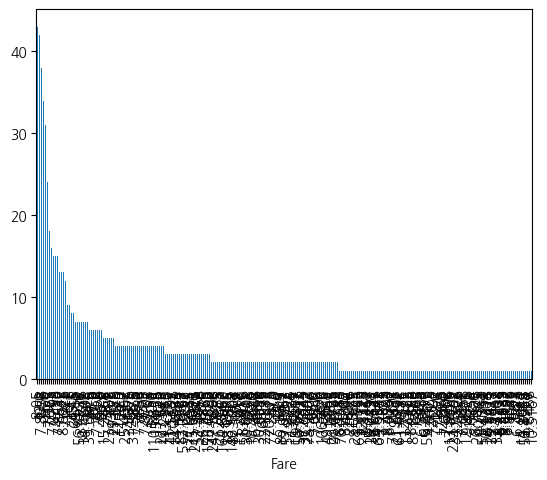

In [86]:
data['Fare'].value_counts().plot(kind='bar')

In [87]:
fare_desc = data['Fare'].describe()

In [90]:
maximun = fare_desc.loc['75%']+(1.5*(fare_desc.loc['75%']-fare_desc.loc['25%']))
                      

In [92]:
outlire = data[data['Fare'] > maximun ]
outlire

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S


Fare를 pclass별로 나누어 확인

In [96]:
pc_fare_desc = data[['Pclass','Fare']].groupby('Pclass').describe()
pc_fare_desc

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [100]:
pc_fare_desc.columns

MultiIndex([('Fare', 'count'),
            ('Fare',  'mean'),
            ('Fare',   'std'),
            ('Fare',   'min'),
            ('Fare',   '25%'),
            ('Fare',   '50%'),
            ('Fare',   '75%'),
            ('Fare',   'max')],
           )

In [103]:
pc1_max = pc_fare_desc.loc[1,('Fare','75%')]+ (1.5 * (pc_fare_desc.loc[1,('Fare','75%')]-pc_fare_desc.loc[1,('Fare','25%')]))
pc2_max = pc_fare_desc.loc[1,('Fare','75%')]+ (1.5 * (pc_fare_desc.loc[2,('Fare','75%')]-pc_fare_desc.loc[2,('Fare','25%')]))
pc3_max = pc_fare_desc.loc[1,('Fare','75%')]+ (1.5 * (pc_fare_desc.loc[3,('Fare','75%')]-pc_fare_desc.loc[3,('Fare','25%')]))

In [108]:
data[(data['Pclass'] == 1) &(data['Fare'] > pc1_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S


In [109]:
data[(data['Pclass'] == 2) &(data['Fare'] > pc2_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [106]:
data[(data['Pclass'] == 3) &(data['Fare'] > pc3_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [110]:
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

<Axes: xlabel='Embarked'>

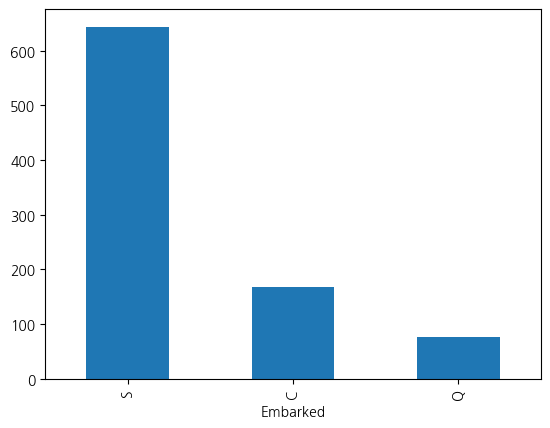

In [113]:
data['Embarked'].value_counts().plot(kind='bar')

# 타겟변수(Survived)와 독립변수(Survived를 제외한 나머지) 관계 파악하기
* groupby

In [114]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [117]:
data[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Pclass는 생존률에 영향을 미침. 1이면 높고 3이면 낮다 

In [119]:
data[['Name','Survived']].groupby('Name').mean()

,Survived
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelson, Mr. Samuel",0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0
...,...
"de Mulder, Mr. Theodore",1.0
"de Pelsmaeker, Mr. Alfons",0.0
"del Carlo, Mr. Sebastiano",0.0


In [120]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


성별별 생존율 : 여자가 남자보다 생존율이 높다.

In [121]:
data[['Age','Survived']].groupby('Age').mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


* 나이를 구간화해서 생존률과의 관계 파악
    * 10, 20, 30, 40, 50
    * 0 - 10 under10s
    * 10 - 19 10s
    * 20 -29 20s

In [123]:
def age_cat(x):
    if x < 10:
        return "under 10s"
    elif 10 <= x < 20:
        return "10s"
    elif 10 <= x < 20:
        return "10s"
    elif 20 <= x < 30:
        return "20s"
    elif 30 <= x < 40:
        return "30s"
    elif 40 <= x < 50:
        return "40s"
    elif 50 <= x < 60:
        return "50s"
    elif 60 <= x < 70:
        return "10s"
    elif 80 <= x < 90:
        return "80s"

In [124]:
data['age_cat'] = data['Age'].apply(age_cat)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30s


연령대별 생존률 구하기

In [127]:
data[['age_cat','Survived']].groupby('age_cat').mean().sort_values(by="Survived", ascending=False)

,Survived
age_cat,
80s,1.000000
under 10s,0.612903
30s,0.437126
50s,0.416667
10s,0.388430
40s,0.382022
20s,0.324937


In [130]:
data[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by="Survived", ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [131]:
data[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by="Survived", ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [132]:
data[['Ticket', 'Survived']].groupby('Ticket').mean().sort_values(by="Survived", ascending=False)

,Survived
Ticket,
W./C. 14258,1.0
110152,1.0
STON/O 2. 3101269,1.0
SOTON/OQ 392089,1.0
SOTON/O.Q. 392078,1.0
...,...
W./C. 6609,0.0
315093,0.0
W/C 14208,0.0


In [138]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [135]:
data[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by="Survived", ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


* pclass, sex, age_cat

In [139]:
data[['Pclass', 'Sex', 'Survived']].groupby(['Pclass','Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [141]:
data[['Pclass', 'Sex', 'age_cat', 'Survived']].groupby(['Pclass','Sex', 'age_cat']).mean().sort_values(by='Survived', ascending=False)

Survived
Pclass Sex    age_cat            
1      female 10s        1.000000
              30s        1.000000
              40s        1.000000
       male   80s        1.000000
2      male   under 10s  1.000000
       female under 10s  1.000000
              10s        1.000000
1      male   under 10s  1.000000
       female 20s        0.960000
2      female 30s        0.941176
1      female 50s        0.916667
2      female 40s        0.900000
              20s        0.888889
              50s        0.833333
3      female 10s        0.560000
              20s        0.547945
              under 10s  0.523810
1      male   30s        0.521739
3      female 30s        0.437500
       male   under 10s  0.380952
1      male   40s        0.375000
              20s        0.358974
              50s        0.266667
              10s        0.200000
2      male   10s        0.153846
3      male   30s        0.150943
              20s        0.127551
2      male   40s        0.125000
              30s        0.096774
3      male   10s        0.090909
              40s        0.080000
2      male   20s        0.054054
1      female under 10s  0.000000
2      male   50s        0.000000
3      female 40s        0.000000
       male   50s        0.000000

In [144]:
data[data['Fare'] == 0].groupby(['Pclass','Sex', 'age_cat']).mean().sort_values(by='Survived', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S,30s
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,40s
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S,20s
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,NaN,S,20s
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S,10s
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,NaN,S,20s
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,NaN,S,20s
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,NaN,S,20s
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S,40s
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,NaN,S,20s


* 데이터의 구간화를 쉽게 해주는 함수 cut
* pd.cut(data['Age'], bins=[구간], labels['구간의 이름'])

In [146]:
data['age_cat2'] = pd.cut(data['Age'], 
       bins=[0,10,20,30,40,50,60,70,80,90],
      labels = ['under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'])

In [147]:
data[['age_cat','age_cat2']]

,age_cat,age_cat2
0,20s,20s
1,30s,30s
2,20s,20s
3,30s,30s
4,30s,30s
...,...,...
886,20s,20s
887,10s,10s
888,20s,20s
889,20s,20s


# 변수들 간의 상관관계 보기 .corr()
* .corr()
* -1 0 1
* -1: 음의 상관관계(반비례 관계, 집과 역의 거리가 멀면 집값이 떨어진다)
* 0: 관계가 없음
* 1: 양의 상관관계 (정비례 관계, 날시가 더워지면 아이스크림 판매량이 높아진다)

In [149]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_cat', 'age_cat2'],
      dtype='object')

In [152]:
data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']].corr(method="spearman")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041560,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032
Age,0.041560,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847
SibSp,-0.061161,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000
